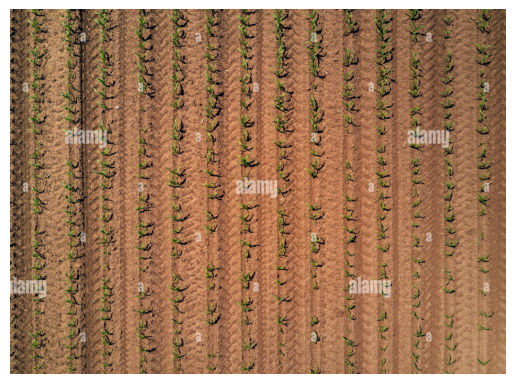

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen RGB
image_path = r'C:\Users\ingdi\Downloads\primaryproject\images\Captura.PNG'
img = Image.open(image_path)
img_np = np.array(img)

# Visualizar la imagen
plt.imshow(img_np)
plt.axis('off')
plt.show()


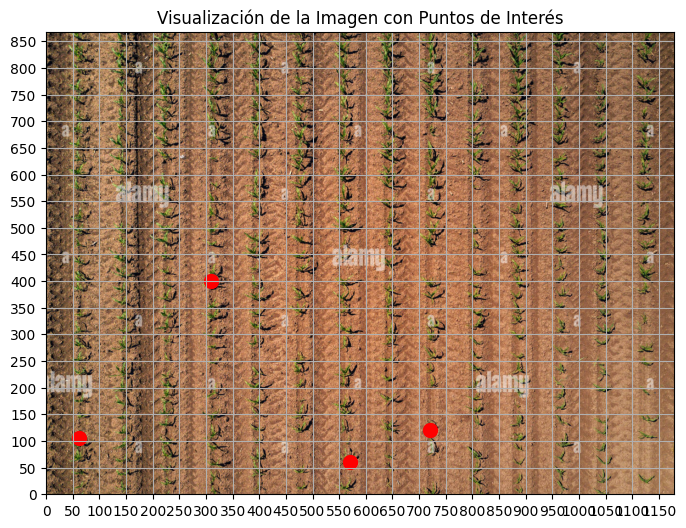

In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# # Asumiendo que img_np es tu imagen numpy y coordenadas_interes contiene tus coordenadas seleccionadas
# image_path = r'C:\Users\ingdi\Downloads\primaryproject\images\Captura.PNG'
# img = Image.open(image_path)
# img_np = np.array(img)

# # Coordenadas de interés (actualiza estas con tus coordenadas reales)
# coordenadas_interes = [(50, 100), (150, 100), (230, 100), (50, 140), (50, 180)]

# # Crear una figura y un eje para mostrar la imagen
# fig, ax = plt.subplots()

# # Mostrar la imagen
# ax.imshow(img_np)

# # Añadir un punto rojo en cada coordenada de interés
# for x, y in coordenadas_interes:
#     # Puedes ajustar el tamaño del punto (s) y el color si es necesario
#     ax.scatter(x, y, s=20, c='red', marker='o')

# # Mostrar el resultado
# plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Carga tu imagen
image_path = r'C:\Users\ingdi\Downloads\primaryproject\images\Captura.PNG'  # Asegúrate de actualizar esto con la ruta de tu imagen
img = Image.open(image_path)
img_np = np.array(img)

# Define tus coordenadas de interés
coordenadas_interes = [(720, 120),(570,60), (62, 105), (310, 400)]

# Crear la figura y el eje con un plano cartesiano
fig, ax = plt.subplots(figsize=(10, 6))  # Puedes ajustar el tamaño de la figura aquí

# Establecer el título de tu gráfico para más claridad si es necesario
ax.set_title('Visualización de la Imagen con Puntos de Interés')

# Mostrar la imagen sobre el plano cartesiano
ax.imshow(img_np, extent=[0, img_np.shape[1], 0, img_np.shape[0]])

# Añadir los puntos rojos para cada coordenada de interés
for x, y in coordenadas_interes:
    ax.scatter(x, y, s=100, c='red', marker='o')  # Ajusta el tamaño y color si es necesario

# Ajustar los límites de los ejes para igualar las dimensiones de la imagen
ax.set_xlim(0, img_np.shape[1])
ax.set_ylim(0, img_np.shape[0])

# Invertir el eje Y para que el origen (0,0) esté en la esquina superior izquierda
# ax.invert_yaxis()

# Opcional: Configurar las marcas (ticks) de los ejes para más claridad
ax.set_xticks(range(0, img_np.shape[1], 50))  # Ajusta según tu imagen
ax.set_yticks(range(0, img_np.shape[0], 50))
ax.grid(True)  # Muestra una cuadrícula para ayudar en la visualización

# Mostrar el gráfico
plt.show()



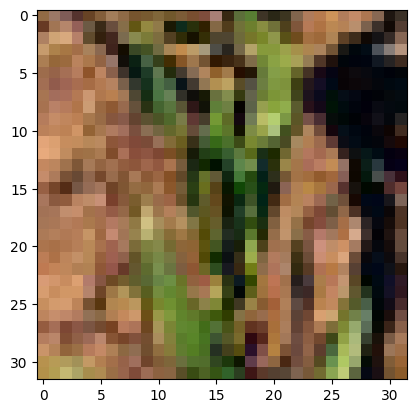

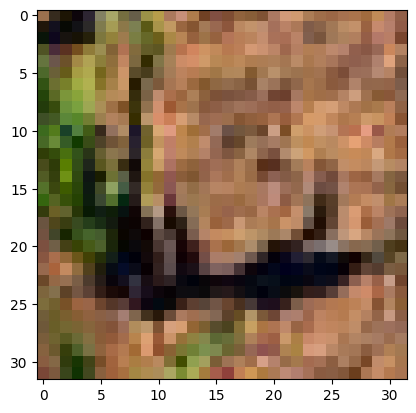

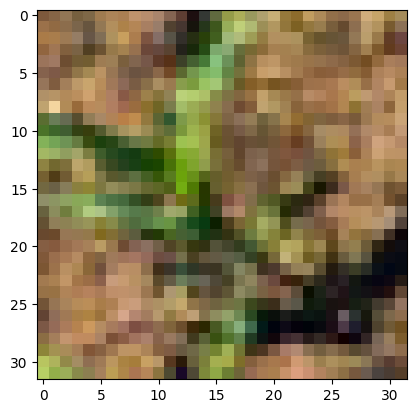

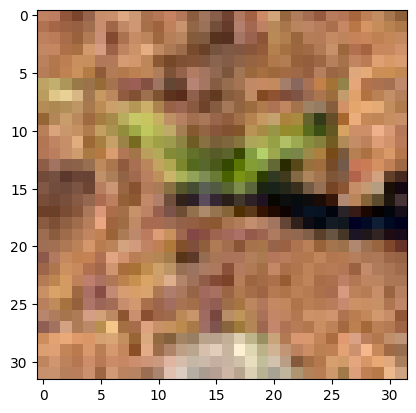

In [4]:
# Función para extraer áreas alrededor de las coordenadas con un cierto radio
radio = 16  # Definir un radio para extraer áreas alrededor de las coordenadas
def extraer_areas(img_np, coordenadas, radio):
    areas = []
    for x, y in coordenadas:
        area = img_np[y-radio:y+radio, x-radio:x+radio]
        areas.append(area)
    return areas

# Extraer las áreas de interés
areas_interes = extraer_areas(img_np, coordenadas_interes, radio)

# Opcional: Visualizar las áreas extraídas
for area in areas_interes:
    plt.imshow(area)
    plt.show()


In [40]:

from skimage.feature import match_template
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# Asumiendo que img_np es tu imagen numpy cargada previamente
# Asumiendo que areas_interes son las plantillas extraídas previamente

def agrupar_detecciones(coincidencias, umbral_dist=10):
    agrupadas = []
    visitado = [False] * len(coincidencias)

    for i, (y, x) in enumerate(coincidencias):
        if not visitado[i]:
            grupo = [(y, x)]
            visitado[i] = True
            for j, (y2, x2) in enumerate(coincidencias):
                if not visitado[j]:
                    distancia = np.sqrt((y - y2)**2 + (x - x2)**2)
                    if distancia <= umbral_dist:
                        grupo.append((y2, x2))
                        visitado[j] = True
            prom_y = int(np.mean([pos[0] for pos in grupo]))
            prom_x = int(np.mean([pos[1] for pos in grupo]))
            agrupadas.append((prom_y, prom_x))
    return agrupadas

def extraer_subimagenes(img_np, coordenadas, radio):
    subimagenes = []
    altura, ancho = img_np.shape[:2]
    for y, x in coordenadas:
        if x-radio >= 0 and y-radio >= 0 and x+radio < ancho and y+radio < altura:
            subimagen = img_np[y-radio:y+radio, x-radio:x+radio]
            subimagenes.append(subimagen)
    return subimagenes

# Proceso de coincidencia de plantillas y agrupación
resultados_combinados = None
for template in areas_interes:
    resultado = match_template(img_np, template)
    if resultados_combinados is None:
        resultados_combinados = resultado
    else:
        resultados_combinados = np.maximum(resultados_combinados, resultado)

umbral = 0.9  # Ajustar basado en pruebas
coincidencias = np.where(resultados_combinados >= umbral)
coincidencias_agrupadas = agrupar_detecciones(list(zip(coincidencias[0], coincidencias[1])))

# Extracción de sub-imágenes usando detecciones agrupadas
radio_subimagen = 25  # Ajustar según el tamaño esperado de las plantas
subimagenes_plantas = extraer_subimagenes(img_np, coincidencias_agrupadas, radio_subimagen)

# # Visualización de sub-imágenes extraídas
# N = min(20, len(subimagenes_plantas))  # Mostrar hasta 5 sub-imágenes
# fig, axes = plt.subplots(1, N, figsize=(20, 4))
# for i, ax in enumerate(axes):
#     if i < len(subimagenes_plantas):
#         ax.imshow(subimagenes_plantas[i])
#         ax.axis('off')
# plt.show()



Número total de plantas contadas: 32


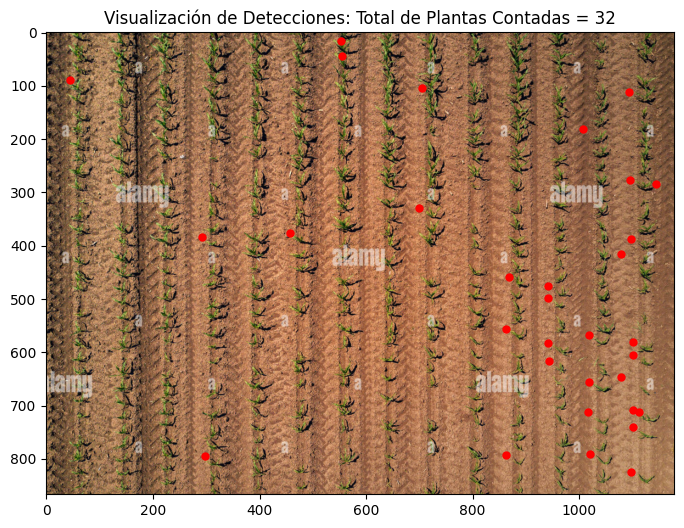

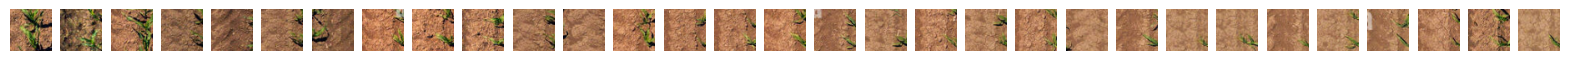

In [43]:
# Visualización de la imagen original con puntos de detección superpuestos
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img_np)
ax.set_title(f"Visualización de Detecciones: Total de Plantas Contadas = {len(coincidencias_agrupadas)}")

# Dibujar un punto rojo en cada detección agrupada
for y, x in coincidencias_agrupadas:
    ax.plot(x, y, 'ro', markersize=5)  # Ajusta 'markersize' según sea necesario

# Imprimir el número total de plantas contadas en la consola
numero_de_plantas_contadas = len(coincidencias_agrupadas)
print(f"Número total de plantas contadas: {numero_de_plantas_contadas}")
plt.show()

# Visualización de sub-imágenes extraídas
N = min(numero_de_plantas_contadas, len(subimagenes_plantas))  # Mostrar hasta 5 sub-imágenes
fig, axes = plt.subplots(1, N, figsize=(20, 4))
for i, ax in enumerate(axes):
    if i < len(subimagenes_plantas):
        ax.imshow(subimagenes_plantas[i])
        ax.axis('off')
plt.show()


In [47]:
def calcular_exg(subimagen):
    if subimagen.ndim == 3 and subimagen.shape[2] >= 3:
        R = subimagen[:,:,0].astype(float) / 255
        G = subimagen[:,:,1].astype(float) / 255
        B = subimagen[:,:,2].astype(float) / 255
        ExG = 2*G - R - B
        return np.mean(ExG)
    else:
        return None


# Asegúrate de que subimagenes_plantas esté definido y contenga las sub-imágenes extraídas anteriormente
# Si no has definido N, puedes hacerlo aquí. N será el número de valores ExG a imprimir
N = numero_de_plantas_contadas

# Calcular ExG para cada sub-imagen
exg_valores = [calcular_exg(subimagen) for subimagen in subimagenes_plantas if subimagen is not None]

# Imprimir los valores de ExG. Si N es mayor que la longitud de exg_valores, ajusta N acorde
print("Valores de ExG calculados para las sub-imágenes (mostrando los primeros N):")
print(exg_valores[:min(N, len(exg_valores))])


Valores de ExG calculados para las sub-imágenes (mostrando los primeros N):
[0.028658823529411757, 0.04349803921568628, 0.0019733333333333343, -0.02840156862745098, -0.05459764705882353, -0.0344078431372549, -0.026770196078431372, -0.07603450980392157, -0.05947137254901961, -0.03850509803921568, -0.038203921568627446, -0.06054745098039216, -0.03856941176470588, -0.06662274509803921, -0.06443607843137256, -0.05469333333333334, -0.05044235294117647, -0.03270274509803922, -0.06079058823529412, -0.02540235294117647, -0.049962352941176465, -0.05063686274509804, -0.046083137254901964, -0.031209411764705878, -0.017507450980392157, -0.05523450980392157, -0.015140392156862746, -0.027424313725490198, -0.058087843137254916, -0.023827450980392156, -0.015032156862745094]


In [48]:
# Asegurándonos de que 'exg_valores' no contenga ningún None

#N = numero_de_plantas_contadas
exg_valores_filtrados = [valor for valor in exg_valores if valor is not None]

# Calcular el promedio de los valores de ExG
if exg_valores_filtrados:
    exg_promedio = sum(exg_valores_filtrados) / len(exg_valores_filtrados)
    print(f"Promedio de ExG para todas las sub-imágenes y numero de plantas encontradas: {exg_promedio}")
    # print(f"Numero de plantas encontradas: "{N})
else:
    print("No hay valores de ExG para calcular el promedio.")

# Opcionalmente, exportar este valor a un archivo
with open('exg_promedio.txt', 'w') as archivo:
    archivo.write(f"Promedio de ExG: {exg_promedio}\n")


Promedio de ExG para todas las sub-imágenes: -0.03634241619228337
